In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('C:\BTS_Master\BTS_DataScienceFoundations/Session_2/3_bike_sharing.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


#### looks like the data its clean and there is no values missing, we have 10886 rows of data

### Let's start by seeing how many total rentals we have

In [17]:
df['count'].sum()

2085476

#### we have a total of 2 085 476 rentals

### Are those rentals mostly from registered users of casual?

In [18]:
print(df[['casual', 'registered']].sum())
print(df[['casual', 'registered']].mean())

casual         392135
registered    1693341
dtype: int64
casual         36.021955
registered    155.552177
dtype: float64


#### Most of the rentals are from registered users, 1 693 341 rentals, compared with 392 135 from casual users

### Is there a significant difference between the type of users who typically rent a bike in workdays and holidays?

In [19]:
df[['casual', 'registered', 'workingday']].groupby(['workingday']).sum()

,casual,registered
workingday,,
0,206037,448835
1,186098,1244506


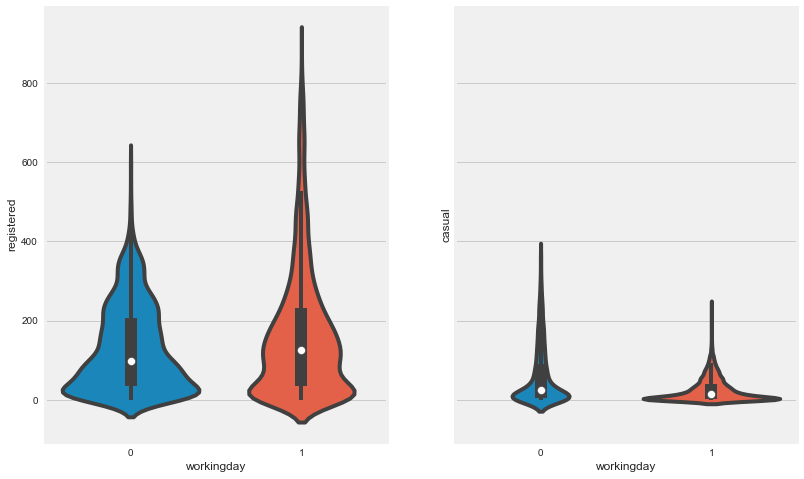

In [20]:
fig, axs = plt.subplots(1,2, figsize=[12,8], sharey=True)

sns.violinplot(y='registered', x='workingday', data=df, ax=axs[0])
sns.violinplot(y='casual', x='workingday', data=df, ax=axs[1])

#### The registered users use a lot more the bikes in work days having some hours with really high number of rentals, in non working days tthe largest concentration is on small numbers of rentals per hour

#### For casul users, they end up using more the bikes on non working days, contrary to registered users. During work days the number of casual users renting bikes is concentrated in really small numbers of rentals. During non work days they use more the bikes and the number of rentals is more evenly distributed.

### We need to consider another thing, there are a lot more working days in the dataset than non workingdays

In [21]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

#### We have more than twice of the amout of hour of working days than of non working days, trying to analyse absolute values of number of rentals might lead us to wrong conclusions. We can use means to avoid that problem, or we can analyse only patterns.

### Let's see now the diference of the number of rentals for each season

In [22]:
df[['season', 'count']].groupby('season').sum()

,count
season,
1,312498
2,588282
3,640662
4,544034


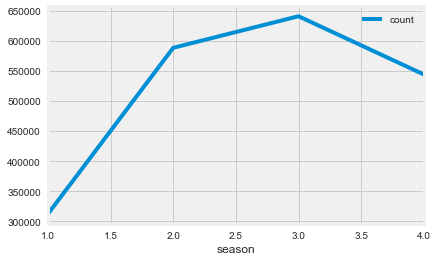

In [23]:
df[['season', 'count']].groupby('season').sum().plot()

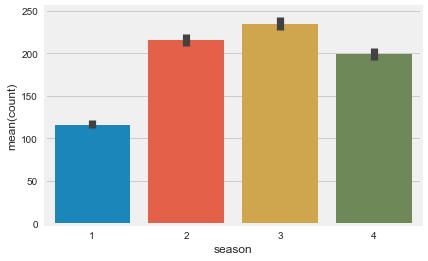

In [24]:
sns.barplot(x='season', y='count', data=df)

#### As expected the number of rentals during the summer is pretty high but the others seasons are a surprise, we have even more rentals during fall than the summer. And the numbers for the winter are also very high. And then we have really low values for spring. Maybe the explanation is not in the seasons but the weather or temperature?

### Lets start with the weather to see what we can find

In [25]:
df[['weather', 'count']].groupby('weather').sum()

,count
weather,
1,1476063
2,507160
3,102089
4,164


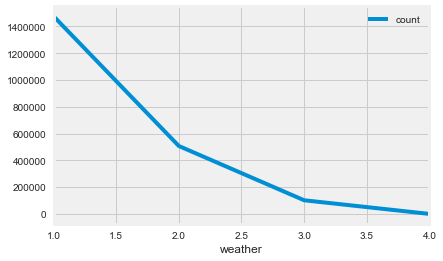

In [26]:
df[['weather', 'count']].groupby('weather').sum().plot()

#### looks like nobody likes to ride a bike when its raining, even if its only a litle, most of the rentals are when its sunny

### But what kind of weather do we usually have in each season?

In [27]:
df[['season', 'weather', 'count']].groupby(['season', 'weather']).count()

count
season weather       
1      1         1759
       2          715
       3          211
       4            1
2      1         1801
       2          708
       3          224
3      1         1930
       2          604
       3          199
4      1         1702
       2          807
       3          225

#### It seems to be well distribuited, the values dont change much from one season to the other

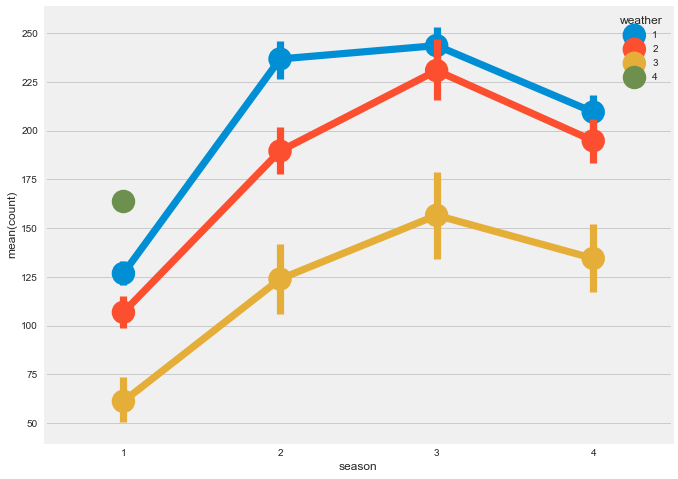

In [28]:
plt.figure(figsize=[10,8])
sns.pointplot(x='season', y='count', hue='weather', data=df)

### Independently of the weather season 1 always have a lot less rentals.

### Maybe its explained by the temperature?

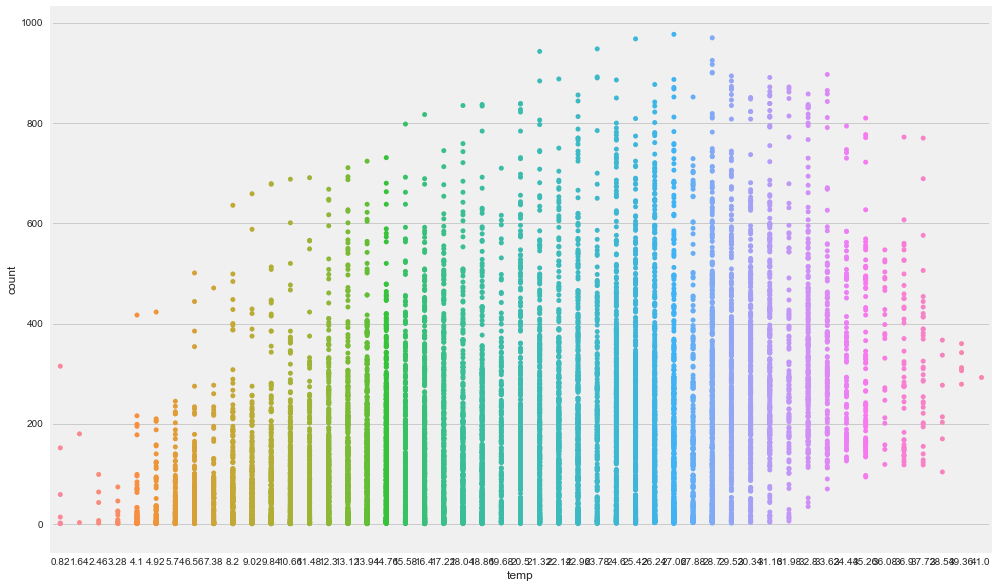

In [29]:
plt.figure(figsize=[15,10])
sns.stripplot(x='temp', y='count', data=df)

In [30]:
df[['season', 'temp']].groupby('season').mean()

,temp
season,
1,12.530491
2,22.823483
3,28.789111
4,16.649239


#### Seems like the temperature is the explanation for the low number of rentals during the spring and the high number during fall and winter. The temperature is correlated with the number of rentals as we can see in the graph above. And as we can see in the table the average temperature during spring is quite low compared with the rest of the year. The average temperature is highest during the fall and thats also the time of the year we have more rentals.

### There are a few features there are probably heavily correlated, lets check that

In [31]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


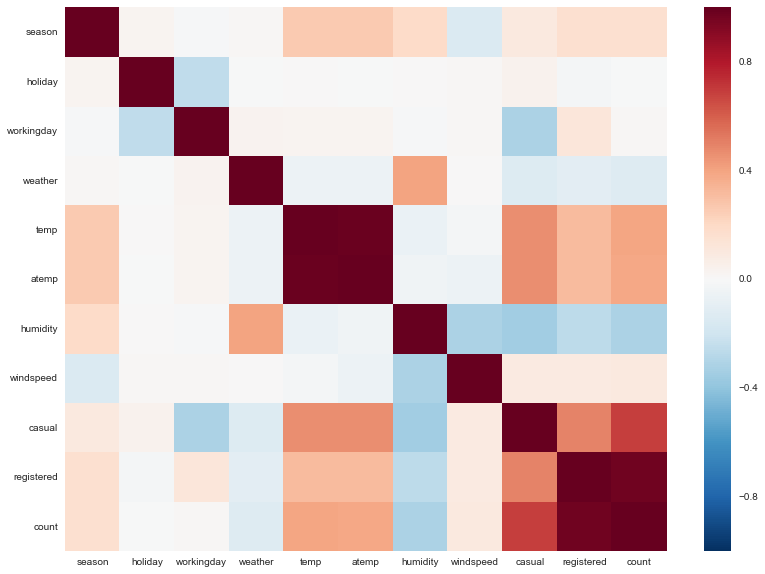

In [32]:
plt.figure(figsize=[12,10])
sns.heatmap(df.corr())

#### The biggest correlations are from the temperature and the 'feels like' temperature, that's expected. And from registered, casual and count, also expected since count is the sum of both. For a deeper analysis we need to consider droping one of the highly correlated features to avoid trouble.
#### we can also see the positive correlation between the temperature and the number of rentals
#### and we also have some interesting negative correlations, the humidity seems to affect negatively the number of rentals and there is also a negative correlation between workingday and casual rentals

### lets look closer at the correlation between humidity and number of rentals

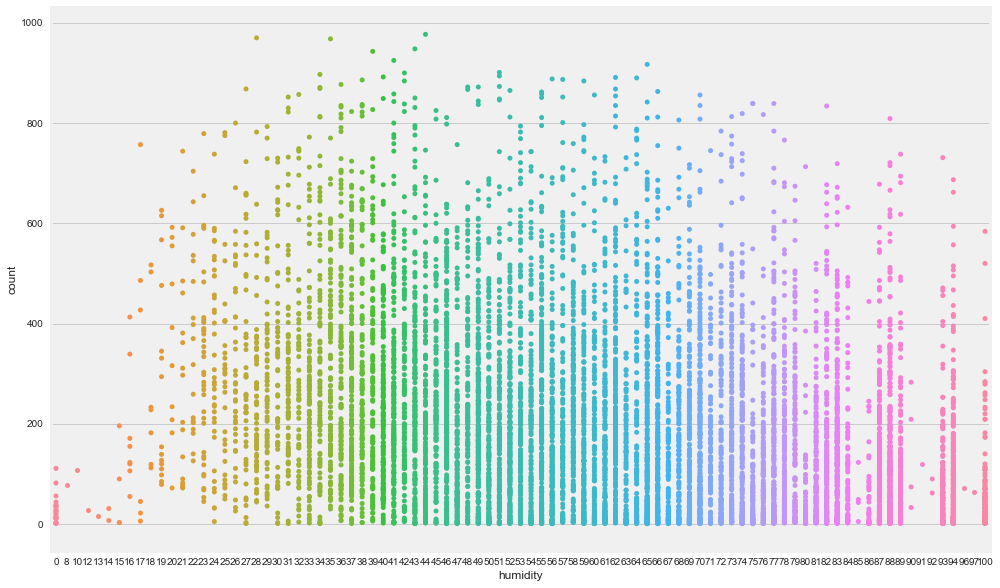

In [33]:
plt.figure(figsize=[15,10])
sns.stripplot(x='humidity', y='count', data=df)

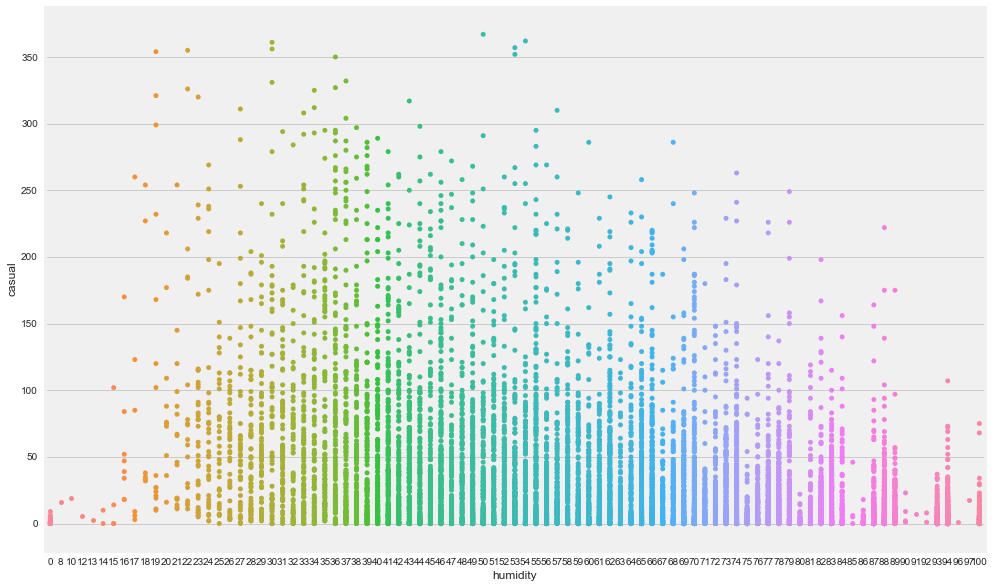

In [34]:
plt.figure(figsize=[15,10])
sns.stripplot(x='humidity', y='casual', data=df)

#### the correlation is easier to notice for the casual users where the correlation is higher, higher humidity makes you less likely to rent the bike

### Now i'm goin to try to analyse the distribuition of rentals based on months of the year and hours of the day

In [35]:
df['hours'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour)
df['month'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").month)

In [36]:
df[['hours', 'count']].groupby('hours').sum()

,count
hours,
0,25088
1,15372
2,10259
3,5091
4,2832
5,8935
6,34698
7,96968
8,165060


In [37]:
df[['hours', 'workingday','count']].groupby(['hours', 'workingday']).sum()

count
hours workingday        
0     0            13701
      1            11387
1     0            10427
      1             4945
2     0             7686
      1             2573
3     0             3677
      1             1414
4     0             1239
      1             1593
5     0             1331
      1             7604
6     0             2899
      1            31799
7     0             6854
      1            90114
8     0            16277
      1           148783
9     0            25799
      1            75111
10    0            38252
      1            41415
11    0            47181
      1            48676
12    0            54971
      1            61997
13    0            56234
      1            61317
14    0            54916
      1            56094
15    0            54187
      1            61773
16    0            53309
      1            90957
17    0            49173
      1           164584
18    0            42376
      1           154096
19    0            35140
      1           108627
20    0            26652
      1            77552
21    0            21567
      1            57490
22    0            17886
      1            43025
23    0            13138
      1            27678

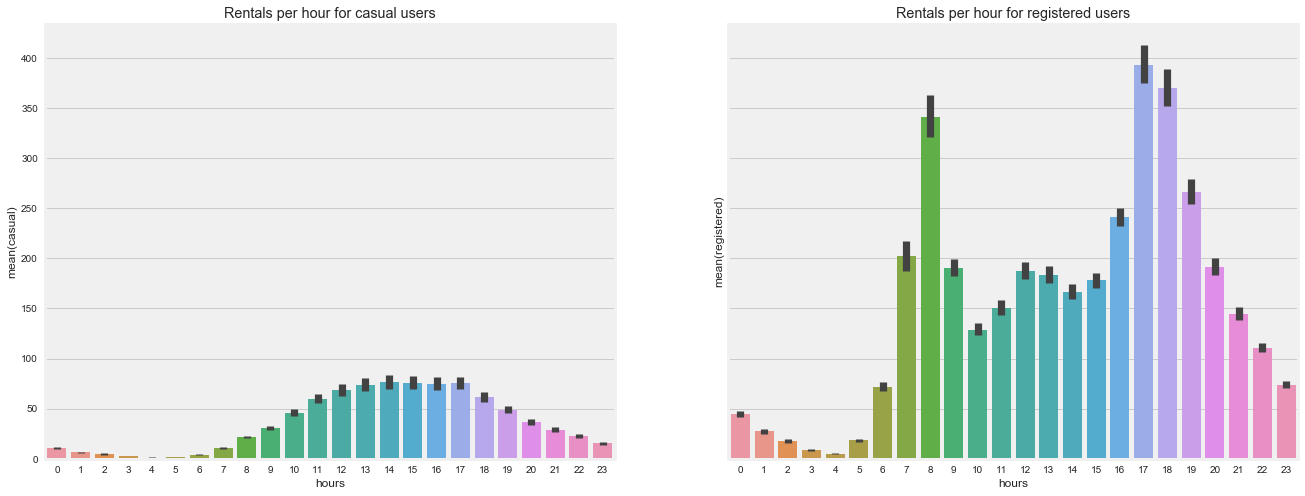

In [38]:
fix, axs = plt.subplots(1,2, sharey=True, figsize=[20,8])
sns.barplot(x='hours', y='casual', data=df, ax=axs[0])
sns.barplot(x='hours', y='registered', data=df, ax=axs[1])
axs[0].set_title('Rentals per hour for casual users')
axs[1].set_title('Rentals per hour for registered users')

#### We can see that the behaviour of casual and registered users is quite different. The registered users seem to follow the work day pattern with a high number of rentals between 7 and 9 in the morning and a increase again in the afternoon after the work has ended, between the 17h and 18h.
#### The casual users don't have a pattern like that, the number of rentals start increasing at 9 or 10 in the morning and keep increasing slowly until 13:00 and then starts decreasing after 17:00h

### These patterns are probably also very different depending if it's a working day or not

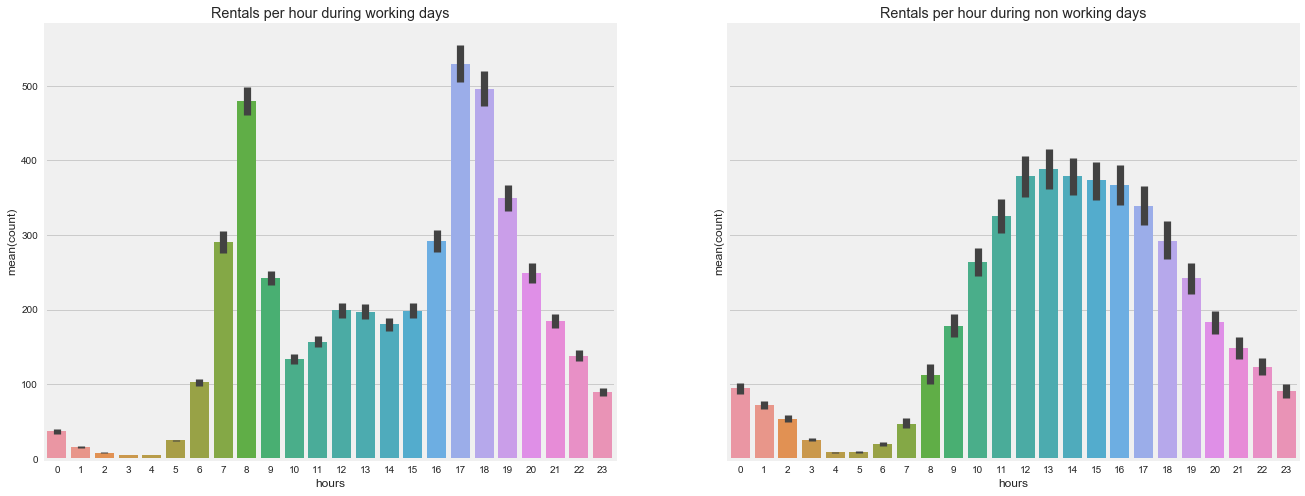

In [39]:
fix, axs = plt.subplots(1,2, sharey=True, figsize=[20,8])
sns.barplot(x='hours', y='count', data=df[df['workingday'] == 1], ax=axs[0])
sns.barplot(x='hours', y='count', data=df[df['workingday'] == 0], ax=axs[1])
axs[0].set_title('Rentals per hour during working days')
axs[1].set_title('Rentals per hour during non working days')

#### For working days the pattern is identical to the pattern of registered users, seems like almost everyone who uses the bikes to go to work regularly is already registered
#### For the other days the pattern very different, people start renting more bikes after 9h in the morning and the tendency keeps going until noon, after 17h the number of rentals start decreasing again

### We can also see the rentals divided by months but it will probably be identical of the pattern we found when we saw divided by seasons

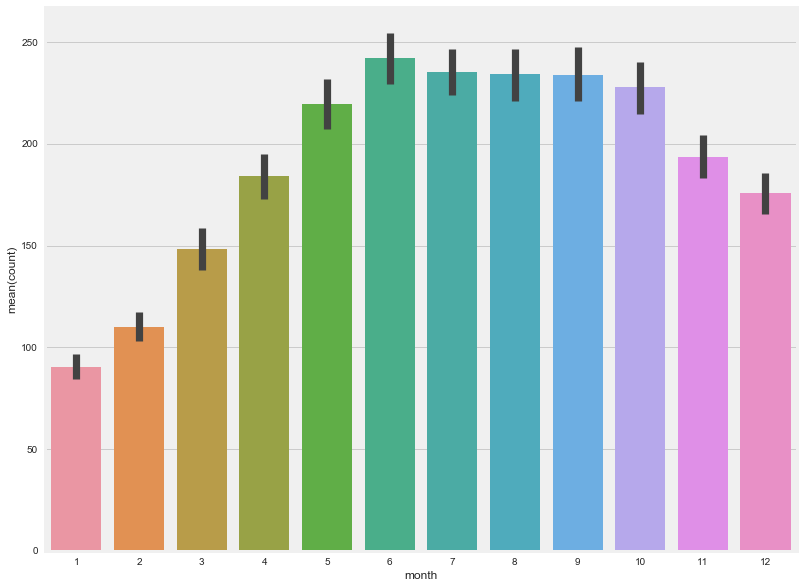

In [40]:
plt.figure(figsize=[12,10])
sns.barplot(x='month', y='count', data=df)

#### As expected there is nothing new here